# NLP-Assignment 

# Objectives:
1)fetch one month of data of coronavirus from twitter before it's outbreak and after outbreak and compare peoples emotion
              
   -Use NLTK library for tokenization and for stopwords.

2) Pick your choice of document and update the emotion document accordingly (you document words and associated emotion where applicable) and analyse the sentiments of people.

3) pick your own document (say A) and create BOW using a count vectorizer. Use another document (say B) and identify how many words of the B document are present in the BOW of A.

# 1)fetch one month of data of coronavirus from twitter before it's outbreak and after outbreak and compare peoples emotion

# Importing required Libraries & Packages

In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Before Outbreak
I set the Timeline before Outbreak in the month of December-2019 to January-2020 as first reported case in India was after 20th January.

In [2]:
def get_tweets():
    import GetOldTweets3 as got  #Library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#Coronavirus') \
        .setSince('2019-12-20') \
        .setUntil('2020-01-20') \
        .setMaxTweets(700)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of choosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [3]:
#Reading Text file 
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0,length):
    text = text_tweets[i][0] + " " + text
    
#Converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

#splitting text into words
tokenized_words = cleaned_text.split()

In [4]:
#Print text
text_tweets

[[' #coronavirus '],
 ['Los #coronavirus causan desde gripa hasta enfermedad grave. Para reducir riesgo: Higiene de manos Tapa boca-nariz al toser-estornudar Cocina bien carne y huevos Evita contacto cercano con personas con enfermedad respiratoria aguda Evitar contacto con animales de granja '],
 ['A scientific team announced that a new-type coronavirus, tentatively named by WHO as the 2019-new coronavirus (2019-nCoV), had caused this #coronavirus outbreak in #Wuhan'],
 ['O #coronavirus #Wuhan provocou 136 novos casos neste fim de semana na China, segundo autoridades'],
 ['Beijing Daxing Health Commission confirms 2 #coronavirus cases; Guangdong Province confirms 1 case. #China'],
 ['Meanwhile China is on the brink of a virus outbreak #coronavirus with travel, how long before it jumps continents '],
 ['New Outbreak of a SARS-Related Coronavirus in China: https://biotech-investments.com #coronaviruses #coronavirus #China #SARS2 #ChineseNewYear #ChineseNewYear2020 #ChinesePneumonia #Inf

In [5]:
stop_words = stopwords.words('english')

In [6]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [7]:
#Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [8]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)
            
w = Counter(emotion_list)
print(w)

Counter({' attracted': 4, ' fearful': 4, ' happy': 2, ' free': 2, ' sad': 2, ' esteemed': 2, ' safe': 1, ' average': 1, ' obsessed': 1, ' powerless': 1, ' surprise': 1, ' attached': 1, ' loved': 1, ' angry': 1, ' alone': 1, ' belittled': 1, ' powerful': 1})


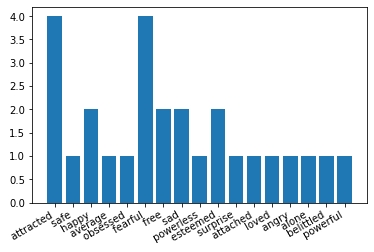

In [9]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# After Outbreak


In [10]:
def get_tweets():
    import GetOldTweets3 as got  #Library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#Coronavirus') \
        .setSince('2020-03-01') \
        .setUntil('2020-03-31') \
        .setMaxTweets(100)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of choosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [11]:
#Reading Text file 
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0,length):
    text = text_tweets[i][0] + " " + text
    
#Converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

#splitting text into words
tokenized_words = cleaned_text.split()

In [12]:
#Print text
text_tweets

[['The real cure for coronavirus: Private research and innovation offer promising new leads. https://www.wsj.com/articles/the-real-cure-for-coronavirus-11585516011 via @WSJ Let the #markets work. #Ancap #justice @CNN @FoxNews #covid19 #coronavirus @US_FDA'],
 ['Italian doctors demand protective supplies as #CoronaVirus deaths...At least 50 doctors have died from COVID-19 while trying to help the sick in Italy '],
 ["#Trump's disgusting #coronavirus bill signing photo op! https://robertpaulreyes.com/trumps-disgusting-coronavirus-bill-photo-op/"],
 ['En medio de la pandemia del #coronavirus, el presidente Alberto Fernández, rechaza las sanciones ilegales contra Cuba y Venezuela. "Acá no es una cuestión política, sino una cuestión humanitaria" #LasSancionesSonUnCrimen'],
 ['I must say: Merits where it’s due. I reckon this Job-Keeper package is one of the greatest initiatives an Australian government has implemented. It’s a beacon of light in so much darkness for so many #coronavirus #ScoM

In [13]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [14]:
#Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [15]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)
            
x = Counter(emotion_list)
print(x)

Counter({' sad': 2, ' singled out': 1, ' average': 1, ' powerless': 1, ' happy': 1, 'fearful': 1})


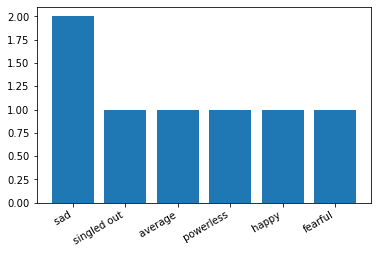

In [16]:
fig, ax1 = plt.subplots()
ax1.bar(x.keys(),x.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# Comparison:
Now,lets compare the peoples emotion before and after the breakout

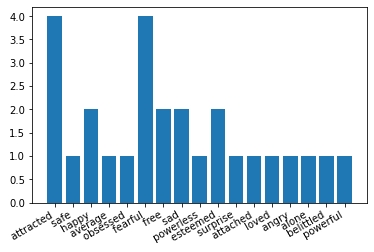

In [17]:
#Before
fig, ax1 = plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

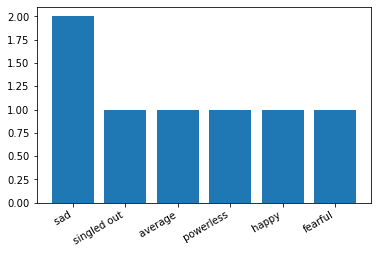

In [18]:
#After
fig, ax1 = plt.subplots()
ax1.bar(x.keys(),x.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# Observations:
1.Before the outbreak the peoples emotions were very different in comparison to after the outbreak.

2.Before the outbreak peoples emotions were a)Happy b)Attracted c)Fearful d)Sad and many more.

3.But after March-2020 majority of the people were sad. It may be due to the follwing:
a).Loss of Jobs   b).Lack of proper medical facilities  c).Disruption of daily Business,Agriculture,Infrastructure activities
and d).Due to exponential increase/rise in the number of deaths etc.
     

# 2) Pick your choice of document and update the emotion document accordingly (you document words and associated emotion where applicable) and analyse the sentiments of people.

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import warnings
warnings.filterwarnings('ignore')

In [20]:
#text = Open('read.txt', 'r',encoding = 'utf-8')
text = open('Jackma_story.txt', encoding = 'utf-8',).read()
lower_case = text.lower()

#str.maketrans remove any punctuations 
cleaned_text = lower_case.translate(str.maketrans('','', string.punctuation))

#Using word_tokenize to tokenize sentence into words
tokenized_words = word_tokenize(cleaned_text, 'english')

In [21]:
#Removing stop words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [22]:
#Lemmatization - From plural to single + Base of a word (example better-> good)
lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [23]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        
        if word in lemma_words:
            emotion_list.append(emotion)
            
print('People emotions from the text \n', emotion_list, '\n \n')

v = Counter(emotion_list)
print('Count of each emotion \n', v)

People emotions from the text 
 [' sad', ' focused', ' free', ' happy', ' alone', ' loved', ' independent', ' hated', ' powerful', 'fearful', 'happy', 'happy'] 
 

Count of each emotion 
 Counter({'happy': 2, ' sad': 1, ' focused': 1, ' free': 1, ' happy': 1, ' alone': 1, ' loved': 1, ' independent': 1, ' hated': 1, ' powerful': 1, 'fearful': 1})


# Checking Polarity classification

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lklqy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
#Test how SentimentIntensityAnalyzer works
sia = SentimentIntensityAnalyzer()

test_sent = "Lebanon's prime minister has announced his government's resignation, less than a week after a huge explosion tore through capital Beirut"
#Sent = "House of cards is a awesome series, one of my best Series"
print(sia.polarity_scores(test_sent))

{'neg': 0.107, 'neu': 0.78, 'pos': 0.112, 'compound': 0.0258}


In [26]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print('\n   Negative Sentiment   ')
        
    elif score['neg'] < score['pos']:
        print('\n   Positive Sentiment   ')
    else:
        print('Neutral Sentiment')


   Positive Sentiment   


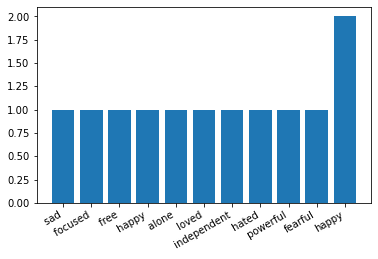

In [27]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(v.keys(), v.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# 3) pick your own document (say A) and create BOW using a count vectorizer. Use another document (say B) and identify how many words of the B document are present in the BOW of A.

# Bag of Words

In [28]:
#Example of single document
#Without stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
#Single document (',' seperate each document)
Doc_A = ['Coronavirus is a family of viruses']
#This step will convert text into tokens
vect_A = CountVectorizer()
vect_A.fit_transform(Doc_A)
print('bag of words :',vect_A.get_feature_names())

bag of words : ['coronavirus', 'family', 'is', 'of', 'viruses']


In [29]:
vect_A.vocabulary_

{'coronavirus': 0, 'is': 2, 'family': 1, 'of': 3, 'viruses': 4}

In [30]:
c_vect = CountVectorizer()
c_vect.fit(Doc_A)

CountVectorizer()

In [31]:
Doc_B = ["Let's understand what is a family of viruses"]
vect_B = c_vect.transform(Doc_B)
print("Text Present at ",vect_B.toarray())
#Compare with the indexes
print('original indexes', vect_A.get_feature_names())

Text Present at  [[0 1 1 1 1]]
original indexes ['coronavirus', 'family', 'is', 'of', 'viruses']


# Bag of words using stopword

In [32]:
#You can avoid writing extra steps to remove stopwords
stop_words = stopwords.words('english')
Doc_A = ['Coronavirus is a family of viruses']
vect_A = CountVectorizer(stop_words=stop_words)
print(vect_A)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])


In [33]:
vect_A.fit_transform(Doc_A)
print('bag of words :',vect_A.get_feature_names())
print('voca         :',vect_A.vocabulary_)

bag of words : ['coronavirus', 'family', 'viruses']
voca         : {'coronavirus': 0, 'family': 1, 'viruses': 2}


In [34]:
# Using function
def text_matrix(message, countvect):
    terms_doc = countvect.fit_transform(message)
    return pd.DataFrame(terms_doc.toarray(),columns=countvect.get_feature_names())

In [35]:
message = ['We are slowly making progress in Natural Language Processing',
           'We will get there','But practice is the only mantra for success']
c_vect = CountVectorizer()
print('Below metrix is the bag of words approach')
text_matrix(message,c_vect)

Below metrix is the bag of words approach


,are,but,for,get,in,is,language,making,mantra,natural,only,practice,processing,progress,slowly,success,the,there,we,will
0,1,0,0,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0


# n-grams

In [36]:
#n-grams example
string = ["This is an example of n-gram!"]

vect1 = CountVectorizer(ngram_range=(1,1))

vect1.fit_transform(string)

vect2 = CountVectorizer(ngram_range=(2,2))
vect2.fit_transform(string)

vect3 = CountVectorizer(ngram_range=(3,3))
vect3.fit_transform(string)

vect4 = CountVectorizer(ngram_range=(4,4))
vect4.fit_transform(string)

print("1-gram  :",vect1.get_feature_names())

print("2-gram  :",vect2.get_feature_names())
print("3-gram  :",vect3.get_feature_names())
print("4-gram  :",vect4.get_feature_names())

1-gram  : ['an', 'example', 'gram', 'is', 'of', 'this']
2-gram  : ['an example', 'example of', 'is an', 'of gram', 'this is']
3-gram  : ['an example of', 'example of gram', 'is an example', 'this is an']
4-gram  : ['an example of gram', 'is an example of', 'this is an example']
